# **1. Import Necessary Libraries**

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# **2. Getting The Data**

In [3]:
!unzip /content/Churn.zip

Archive:  /content/Churn.zip
replace churn.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [100]:
df= pd.read_csv('churn.csv')
print(df.shape)

df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **3.Problem Definition & Data Acquisition**

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [102]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [103]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

**Observation**
1. RowNumber and Surname column can drop.
2. Exited is target variable.
3. 2 float, 9 int and 3 object.
4. Age have some outlier.
5. Balance also have some outlier.

# **4. Pre Profilling And Post Profilling**

In [104]:
df=df.drop(['RowNumber', 'Surname'], axis=1)

In [105]:
df.sample(5)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5069,15740878,655,Spain,Female,29,9,0.0,2,0,1,85736.26,0
3970,15634310,509,France,Male,30,6,0.0,2,1,0,180598.86,0
881,15571928,679,France,Female,43,4,0.0,3,1,0,115136.51,1
6557,15707242,504,Spain,Male,40,5,0.0,2,0,0,146703.36,0
4092,15780779,583,Spain,Female,40,4,0.0,2,1,0,114093.73,0


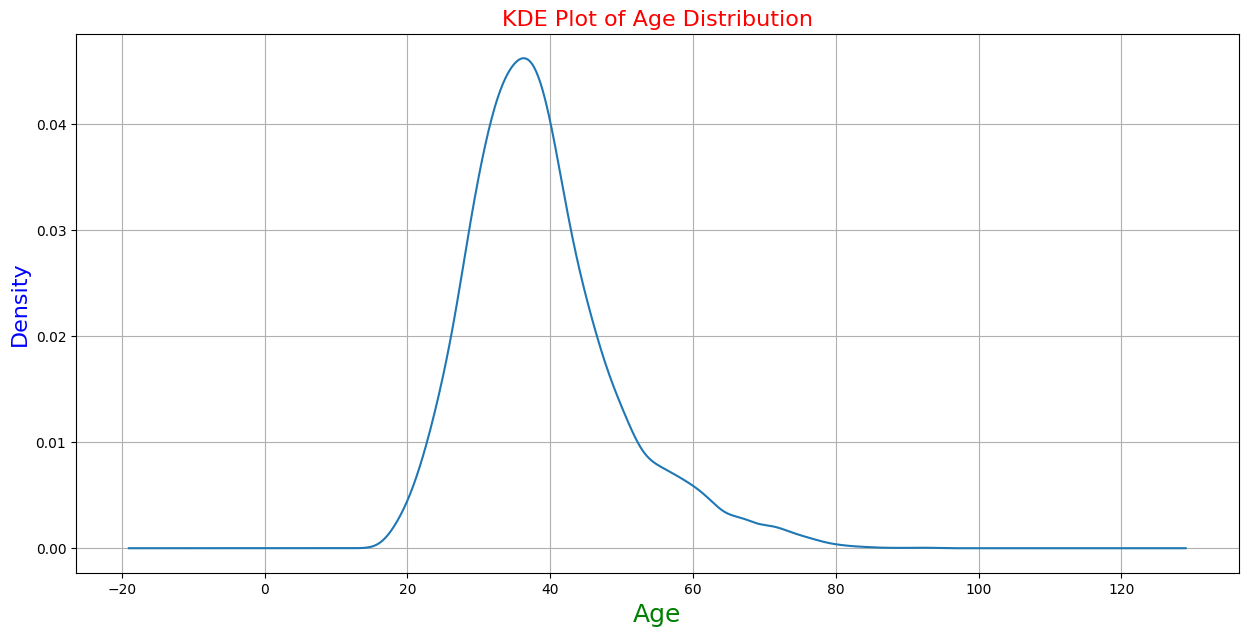

In [106]:
paper = plt.figure(figsize = [15,7])
# Plot the KDE for the 'Age' column
df['Age'].plot(kind='kde')

# Customize the plot for better readability (optional)
plt.xlabel('Age', color='g', size=18)
plt.ylabel('Density', color='b', size=16)
plt.title('KDE Plot of Age Distribution', color='r', size=16)
plt.grid()
plt.show()


<Axes: >

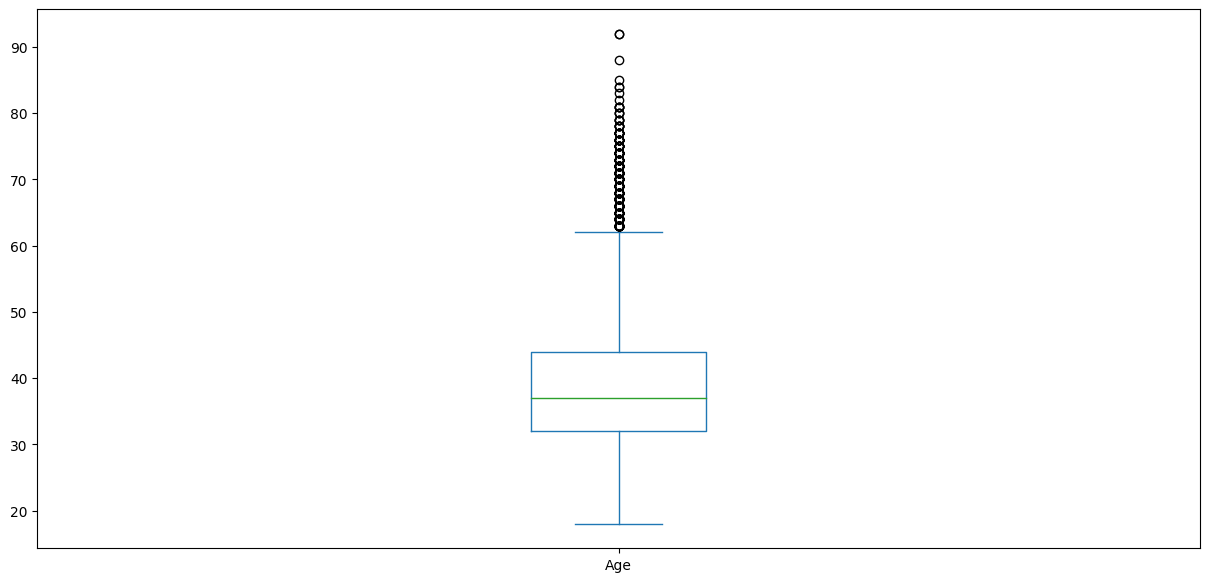

In [108]:
paper = plt.figure(figsize = [15,7])
df['Age'].plot.box()

In [109]:
df.shape

(10000, 12)

<ipython-input-110-669ded61200e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


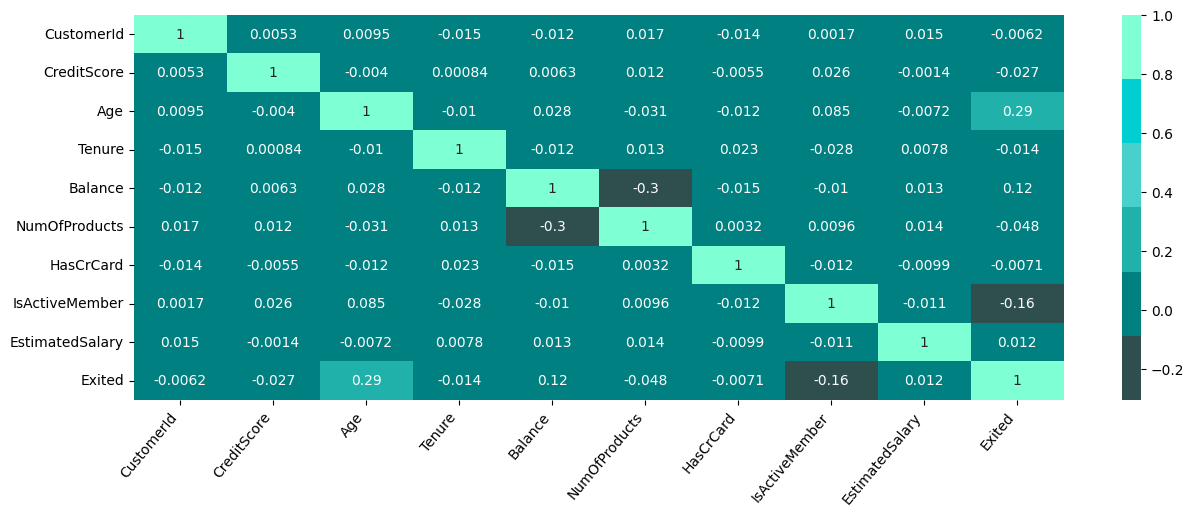

In [110]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(),
            cmap = ['#2F4F4F','#008080','#20B2AA','#48D1CC','#00CED1','#7FFFD4'],
            annot=True)
plt.xticks(rotation=50, ha='right');

In [111]:
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [112]:
selected_features = ['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']

In [113]:
X = df[selected_features]
y = df[['Exited']]
display(X.head())
display(y.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


,Exited
0,1
1,0
2,1
3,0
4,0


In [114]:
X['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoding = OneHotEncoder()
t = encoding.fit_transform(X[["Geography", "Gender"]])
X[["France", "Germany", "Spain", "Female", "Male"]] = pd.DataFrame(t.todense())

In [116]:
X.drop(columns=["Geography", "Gender"], inplace=True)

# **5.Train Test Split**

In [135]:
from sklearn.model_selection import train_test_split

scaler= StandardScaler()


train_X, test_X, train_y, test_y = train_test_split(X, y, random_state =8, train_size=0.75)

# **6. Model Development & Evaluation**

In [140]:
model= LogisticRegression(random_state=69)              # Logistic Regression
model.fit(train_X, train_y)
y_pred= model.predict(test_X)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [141]:
accuracy_score(test_y,y_pred)*100                 # Accuracy_Score

79.72

In [142]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(train_X,train_y)
y1_pred=model2.predict(test_X)

<ipython-input-142-c5b0efc4ff9c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(train_X,train_y)


In [143]:
accuracy_score(test_y,y1_pred)*100

87.16000000000001

# **7. Conclusion**
In this dataset, my target column is 'Exited.' I applied two algorithms, **Logistic Regression** and **Random Forest**. The accuracy score for **Logistic Regression is 79.72%**, while for **Random Forest, it is 87.16%**.